# Exploration of MNIST Dataset

The aim of this notebook is to explore the accuracy and prediction of different Machine Learning and Deep Learning classification models, and to give the retained approach. 

## Libraries and Functions

In [1]:
#import useful libraries

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

## Data preprocessing

In [2]:
#load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#dimension of train set
print(train.shape)

(42000, 785)


In [4]:
#dimension of test set
print(test.shape)

(28000, 784)


In [5]:
#preview of train set
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

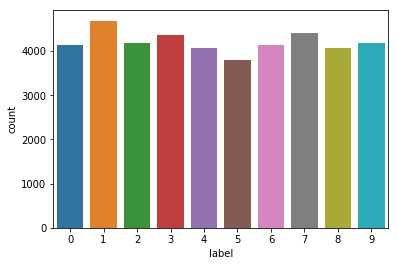

In [6]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)
del train
X_test = test

#counts the values of Y_train
g = sns.countplot(Y_train)
Y_train.value_counts()

Same range of values for the 10 digits (0,1,..,9)

In [7]:
X_train.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [8]:
def get_best_score(model):
    
    print('Best score : {}'.format(model.best_score_))    
    print('Best parameters : {}'.format(model.best_params_))
    print('Best estimator : {}'.format(model.best_estimator_))
    
    return model.best_score_

In [9]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc

In [10]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [11]:
#normalize data

X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train.shape[0]

42000

In [13]:
X_train_reshape = X_train.values.reshape(X_train.shape[0],28,28,1)

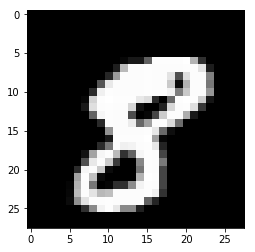

In [14]:
plt.imshow(X_train_reshape[10][:,:,0], cmap=plt.get_cmap('gray'))

In [15]:
#split data into training and validation sets (80% - 20%)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

## Scikit Classifiers

In [16]:
#Perceptron

clf_Perceptron = Perceptron(random_state=0)
param_grid = { 'penalty': ['l1'], 'tol': [0.1] } # with l2 penalty : best score around 0.82
GridCV_Perceptron = GridSearchCV(clf_Perceptron, param_grid, verbose=1, cv=5)
start_time = time.time()
GridCV_Perceptron.fit(X_train,Y_train)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score_grid_Perceptron = get_best_score(GridCV_Perceptron)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


Time consumed to fit model:  00:01:24
Best score : 0.8400595238095238
Best parameters : {'penalty': 'l1', 'tol': 0.1}
Best estimator : Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=0.1,
      validation_fraction=0.1, verbose=0, warm_start=False)


In [17]:
pred_val_perc = GridCV_Perceptron.predict(X_val)
acc_perc = print_validation_report(Y_val, pred_val_perc)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       816
           1       0.97      0.88      0.92       909
           2       0.95      0.83      0.88       846
           3       0.89      0.85      0.87       937
           4       0.96      0.80      0.88       839
           5       0.77      0.82      0.80       702
           6       0.94      0.91      0.93       785
           7       0.83      0.93      0.88       893
           8       0.70      0.90      0.78       835
           9       0.85      0.80      0.83       838

   micro avg       0.87      0.87      0.87      8400
   macro avg       0.88      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400

Accuracy : 0.8685714285714285


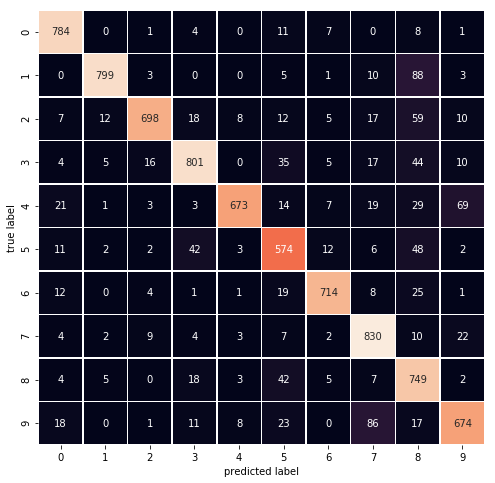

In [18]:
plot_confusion_matrix(Y_val, pred_val_perc)

In [19]:
#Logistic Regression

clf_LR = LogisticRegression(random_state=0)
param_grid = {'C': [0.014,0.012], 'multi_class': ['multinomial'],  
              'penalty': ['l1'],'solver': ['saga'], 'tol': [0.1] }
GridCV_LR = GridSearchCV(clf_LR, param_grid, verbose=1, cv=5)
GridCV_LR.fit(X_train,Y_train)
score_grid_LR = get_best_score(GridCV_LR)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.6min finished


Best score : 0.8744940476190476
Best parameters : {'C': 0.014, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1}
Best estimator : LogisticRegression(C=0.014, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=0, solver='saga',
          tol=0.1, verbose=0, warm_start=False)


In [20]:
pred_val_lr = GridCV_LR.predict(X_val)
acc_lr = print_validation_report(Y_val, pred_val_lr)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       816
           1       0.90      0.98      0.94       909
           2       0.89      0.85      0.87       846
           3       0.89      0.82      0.85       937
           4       0.84      0.91      0.87       839
           5       0.81      0.81      0.81       702
           6       0.88      0.91      0.89       785
           7       0.89      0.88      0.89       893
           8       0.89      0.82      0.85       835
           9       0.83      0.85      0.84       838

   micro avg       0.88      0.88      0.88      8400
   macro avg       0.88      0.88      0.88      8400
weighted avg       0.88      0.88      0.88      8400

Accuracy : 0.8773809523809524


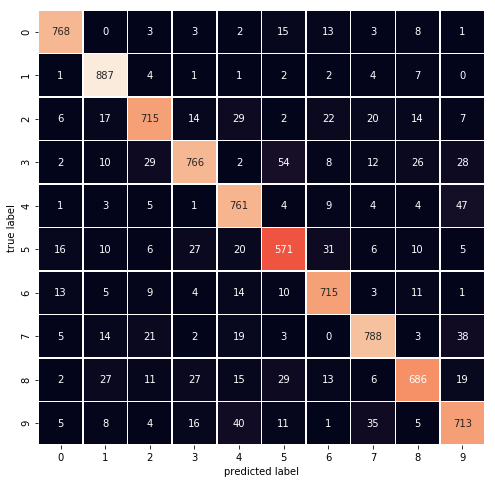

In [21]:
plot_confusion_matrix(Y_val, pred_val_lr)

In [22]:
#RF

clf_RF = RandomForestClassifier(random_state=0)
param_grid = {'max_depth': [15], 'max_features': [100],  
              'min_samples_split': [5],'n_estimators' : [50] }
GridCV_RF = GridSearchCV(clf_RF, param_grid, verbose=1, cv=5)
GridCV_RF.fit(X_train,Y_train)
score_grid_RF = get_best_score(GridCV_RF)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished


Best score : 0.955922619047619
Best parameters : {'max_depth': 15, 'max_features': 100, 'min_samples_split': 5, 'n_estimators': 50}
Best estimator : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [23]:
pred_val_rf = GridCV_RF.predict(X_val)
acc_rf = print_validation_report(Y_val, pred_val_rf)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       816
           1       0.97      0.99      0.98       909
           2       0.95      0.95      0.95       846
           3       0.96      0.93      0.94       937
           4       0.95      0.96      0.96       839
           5       0.95      0.94      0.95       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

   micro avg       0.96      0.96      0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Accuracy : 0.9569047619047619


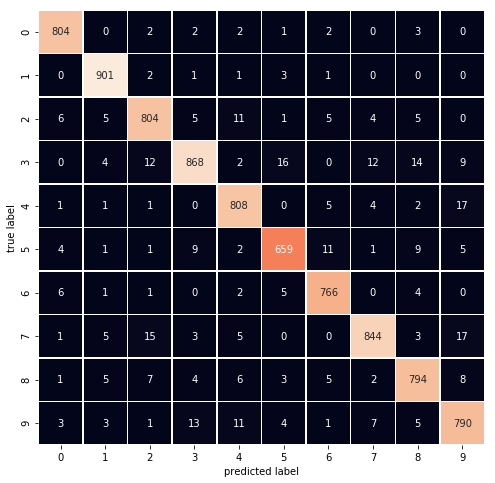

In [24]:
plot_confusion_matrix(Y_val, pred_val_rf)